앞의 로지스틱 회귀 같은 경우는 확률적 판별모형이였다. 베이즈정리 사용하지 않았다. <br>
그러나, 앞으로 나올 ***LDA, QDA, 나이브베이즈*** 같은 경우는 확률적 생성모형이다. 베이지안 정리를 사용한다. <br>

**확률적 생성모형은 베이즈룰을 이용해서 조건부확률을 계산하는 과정이 있다.**

## 7.1 선형판별분석법과 이차판별분석법

선형판별분석법(linear discriminant analysis, LDA)과 이차판별분석법(quadratic discriminant analysis, QDA)는 대표적인 확률론적 생성모형(generative model)이다. 가능도 즉, y의 클래스값에 따른 x의 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률분포를 찾아낸다.

![1_70.jpeg](./materials/1_70.jpeg)

즉, 먼저 모델입장에서 y=0, y=1 등 일때 x가 어떻게 생겼는지를 분포를 공부한다. <br>
예를 들어, 의사가 되기 위해 공부한다면 "정상인은 체온을 재면 37도 근처에서 나오고 감기에 걸리면 40도 +-2 이렇게 나오는 분포다." 이것을 먼저 공부한다. <br>

즉, y의 클래스에 따른 x의 분포를 먼저 공부하면, "감기에 걸린 사람의 체온 예로 들어 봐라." 이런 질문에 대답할 수가 있다.<br>

그럼 이제, 반대로 묻는다. "이 사람 체온이 39도 인데 감기에 걸렸을까?" 대답할 수 있겠지. 

### 생성모형

생성모형에서는 베이즈 정리를 사용하여 조건부확률 $p(y = k \mid x)$ 을 계산한다.

$$
P(y = k \mid x) = \dfrac{P(x \mid y = k)\; P(y = k)}{P(x)}
$$

분류문제를 풀기 위해서는 각 클래스 $k$에 대한 확률을 비교하여 가장 큰 값을 선택한다. 따라서 모든 클래스에 대해 값이 같은 분모 ${P(x)}$은 굳이 계산하지 않아도 괜찮다.

$$
P(y = k \mid x) \;\; \propto \;\; P(x \mid y = k) \; P(y = k)
$$


여기에서 사전확률 $P(y = k)$는 특별한 정보가 없는 경우, 다음처럼 계산한다.

$$
P(y = k) \approx  \frac{y=k인 데이터의 수}{모든 데이터의 수}$$

만약 다른 지식이나 정보로 알고 있는 사전확률값이 있다면 그 값을 사용하면 된다.

만약 다른 지식이나 정보로 알고 있는 사전확률값이 있다면 그 값을 사용하면 된다. <br>
진짜 아무 데이터도 없고 아무것도 모르면, $1/n$라고 대답하는 수 밖에 없지. 

우리가 알고 싶은 것은 X에 대해서, 
$$
P(y=0|x),
P(y=1|x),
P(y=2|x),
P(y=3|x)
$$
이렇게 구해서, 가장 큰 것을 고르면 되는 것. 누가 제일 큰지만 알면 돼. 꼭 다 더해서 1이 되게 만들 필요도 없다.<br>
그러면, 생각 해보면 누가 제일 큰지 구별하는데 위 베이즈정리 식에서, $P(x)$를 알아서 뭐해. 어차피 제일 큰 것만 고르면 되는데. <br>
대신 그렇게 해서 $P(X)$ 없앴으면 이제 확률은 아니지. 그래서, 이제 equal 등호로 표현을 안하고 비레 표시로 한다. 

***결국은 P(X|Y=k)를 알아내는 것이 이 모형들의 핵심. 이것을 어떻게 알아내느냐에 따라 이름이 LDA, QDA, Naive Baysian 등등으로 나뉘는 것.***

$y$에 대한 $x$의 조건부확률인 가능도는 다음과 같이 계산한다.

1. $P(x \mid y = k)$ 가 특정한 확률분포 모형을 따른다고 가정한다. 즉, 확률밀도함수의 형태를 가정한다(정규분포를 가장 많이 가정, 회귀분석에서는 x의 분포 이런거는 따로 가정 안했음. y, disturbance만 가정했었지. 그러나, 여기서는 x의 분포가 중요하다).
2. $k$번째 클래스에 속하는 학습 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수값을 구한다(가우시안 분포였으면, $\mu$, $\sigma$).
3. 모수값을 알고 있으므로 $P(x \mid y = k)$의 확률 밀도 함수를 구한 것이다. 즉, 새로운 독립변수 값 $x$이 어떤 값이 되더라도 $P(x \mid y = k)$의 값을 계산할 수 있다.

예를 들어보자. <br>
정상인의 체온은 정규분포라 가정. <br>
정상인 데이터를 모아서 평균과 시그마 구한다. <br>
그러면, $P(X|정상인)$의 수식을 알고 있는 것. <br>
그렇다면, 정상인 체온이 37.8일 확률밀도는? 

In [19]:
rv=sp.stats.norm(37.5, scale=0.1)
rv.pdf(37.8)

0.044318484119383855

정상인이 체온이 37.8일 확률밀도는 0.044

그렇다면, 정상이 아닌 사람은? $\mu=40$, $\sigma=0.2$라고 구해졌다. 

In [20]:
rv=sp.stats.norm(40, scale=0.2)
rv.pdf(37.8)

1.0594096267545113e-26

비정상인이 체온이 37.8일 확률밀도는 엄청 작아. 

이 과정을 할 수 있게 되면, 이제 다 구할 수 있는 것. 

그럼, 데이터 보니깐 38.4도야. 정상인일까? 비정상인일까? <br>
정상인이 38.4일 확률과 비정상인이 38.4일 확률을 비교해서 더 높은 놈 고르면 된다는 거야. 

### 이차판별분석법(QDA)

여기서 엄청 주의하는게, y가 k마다 다변수정규분포. <br>
다변수정규분포에서 모수는 mu(평균벡터)와 sigma(공분산행렬)가 모수잖아. <br>
***그 어떻게 생겼는지 모양/모수가, mu와 sigma가 class마다 다르다는 것이 중요하다.*** 

이차판별분석법에서는 독립변수 $x$가 실수이고 확률분포가 다변수 정규분포라고 가정한다. 단 $x$ 분포의 위치와 형태는 클래스에 따라 달라질 수 있다.

$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$

이 분포들을 알고 있으면 독립변수 $x$에 대한 $y$ 클래스의 조건부확률분포는 다음과 같이 베이즈 정리와 전체 확률의 법칙으로 구할 수 있다.

$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$

예를 들어 $y$가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 $x$의 확률분포가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

$y$의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

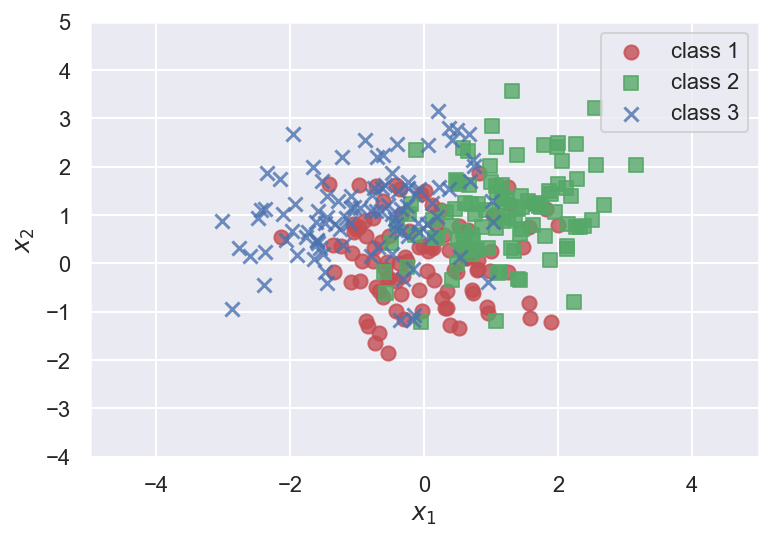

In [21]:
N = 100

# 각 x1, x2라는 데이터는 class에 따라 서로 다른 다변수정규분포에서 나온 값. 
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [26]:
np.vstack([X1, X2, X3])

array([[ 1.47591208,  0.33479554],
       [ 0.81887095,  1.87486576],
       [ 1.56251112, -0.81764934],
       [ 0.794901  , -0.12663453],
       [-0.08635909,  0.34353135],
       [ 0.1205155 ,  1.21673251],
       [ 0.63672984,  0.10180062],
       [ 0.37136262,  0.27917197],
       [ 1.25003624, -0.17164772],
       [ 0.26193123, -0.71458776],
       [-2.13598453,  0.54685655],
       [ 0.72323921, -0.62093981],
       [ 1.89901296, -1.21680962],
       [ 0.03828432, -0.15660924],
       [ 1.2824151 ,  1.22935375],
       [ 0.12963832,  0.31639346],
       [-0.74277485, -1.65725323],
       [-0.29108419,  0.13081093],
       [ 1.02933503,  1.00598316],
       [-0.32406087, -0.25292463],
       [-0.87728235, -1.18807224],
       [-1.42756806,  1.63213579],
       [-0.42640561, -0.36651926],
       [-1.0481638 ,  0.6504951 ],
       [-1.35028382, -0.17799129],
       [-0.74920108,  0.32370585],
       [-0.42737024, -0.98778775],
       [-0.02357894,  0.35836815],
       [ 0.0556523 ,

In [24]:
X.shape

(300, 2)

In [25]:
y.shape

(300,)

이거 지금 우리한테 주어져있는 데이터만 보여준거야(라벨링 되있는 정답까지 보여준 것. 우리는 이 class를 맞춰야 돼). 

Scikit-Learn은 이차판별분석법을 위한 `QuadraticDiscriminantAnalysis` 클래스를 제공한다. 

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

학습용 데이터에서 가능도를 추정한 후에는 다음과 같은 속성을 가지게 된다.

* `priors_`: 각 클래스 $k$의 사전확률.
* `means_`: 각 클래스 $k$에서 $x$의 기댓값 벡터 $\mu_k$의 추정치 벡터.
* `covariance_`: 각 클래스 $k$에서 $x$의 공분산 행렬 $\Sigma_k$의 추정치 행렬. (생성자 인수 `store_covariance` 값이 True인 경우에만 제공)

In [3]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [43]:
X1.mean(axis=0), X2.mean(axis=0), X3.mean(axis=0)

(array([-0.00080125,  0.1194572 ]),
 array([1.16303727, 1.03930605]),
 array([-0.8640604 ,  1.02295794]))

In [4]:
# mu1, mu2, mu3 모수 추정
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [45]:
np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)

(array([[ 0.73846319, -0.01762041],
        [-0.01762041,  0.72961278]]),
 array([[0.66534246, 0.21132313],
        [0.21132313, 0.78806006]]),
 array([[0.9351386 , 0.22880955],
        [0.22880955, 0.79142383]]))

In [29]:
# 각 sig(공분산행렬) 모수 추정
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [30]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [31]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

그럼, 각 class 별로 mu와 sigma를 다 추정했어?<br>
그러면, likelihood를 알게 된 거잖아. 

예를 들어, class=1이면서, $x_1 = 2$, $x_2 = 1$일 확률을 구해보자. <br>
$P(2, -1 | y=1)$을 구하라는 것. <br>
그리고, $P(2, -1 | y=2)$, $P(2, -1 | y=3)$도 구해보자.

In [55]:
rv1 = sp.stats.multivariate_normal(qda.means_[0], qda.covariance_[0])
rv2 = sp.stats.multivariate_normal(qda.means_[1], qda.covariance_[1])
rv3 = sp.stats.multivariate_normal(qda.means_[2], qda.covariance_[2])


rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])

(0.006562123656856293, 0.0034060346804690735, 1.5412251295785986e-05)

지금 우리는 가능도를 구한거야. 그러면, 이제 prior을 알아야지. 

현재는 prior $P(y=k)$. 현재 priors가 k갯수/n을 해서 구해 놓은 것. 


In [57]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

그럼 이제 두개 곱하면 posterior 계산할 수 있잖아. 

In [59]:
rv1.pdf([2, -1])*qda.priors_[0], rv2.pdf([2, -1])*qda.priors_[1], rv3.pdf([2, -1])*qda.priors_[2]

(0.0021873745522854307, 0.001135344893489691, 5.137417098595329e-06)

제일 큰거 고른게 우리의 추정.<br>
그렇게 골라서 하단에 그림으로 표시해 놓은 것.

이 확률분포를 사용하여 분류를 한 결과는 다음과 같다.

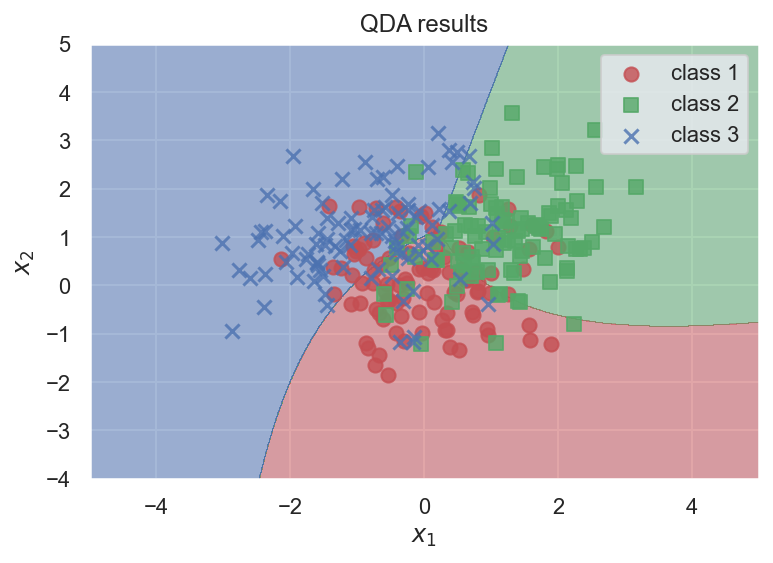

In [77]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("QDA results")
plt.legend()
plt.show()

In [107]:
XX1

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [108]:
XX2

array([[-4.   , -4.   , -4.   , ..., -4.   , -4.   , -4.   ],
       [-3.991, -3.991, -3.991, ..., -3.991, -3.991, -3.991],
       [-3.982, -3.982, -3.982, ..., -3.982, -3.982, -3.982],
       ...,
       [ 4.982,  4.982,  4.982, ...,  4.982,  4.982,  4.982],
       [ 4.991,  4.991,  4.991, ...,  4.991,  4.991,  4.991],
       [ 5.   ,  5.   ,  5.   , ...,  5.   ,  5.   ,  5.   ]])

In [106]:
qda.predict([[2, 3]])

array([1.])

array([[-5.  , -4.  ],
       [-4.99, -4.  ],
       [-4.98, -4.  ],
       ...,
       [ 4.97,  5.  ],
       [ 4.98,  5.  ],
       [ 4.99,  5.  ]])

In [82]:
XX1

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

[등고선 그리는 방법](https://m31phy.tistory.com/220)

In [68]:
XX3, XX4 = np.meshgrid([1, 2, 3],
                       [4, 5, 6])

In [69]:
XX3

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [70]:
XX4

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

#### 연습 문제 1

이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [113]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

In [116]:
iris.feature_names, X1.shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150, 4))

In [117]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X1, y1)

다변수정규분포 총 3개 만들게 된다. class 3개니깐. 

In [119]:
qda.means_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [120]:
qda.covariance_

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

In [121]:
qda.predict(X1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
confusion_matrix(y1, qda.predict(X1))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y1, qda.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [125]:
from sklearn.preprocessing import label_binarize

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [131]:
# 1, 2, 3열이 각각 1, 2, 3일 확률
qda.predict_proba(X1)

array([[1.00000000e+000, 4.91851689e-026, 2.98154146e-041],
       [1.00000000e+000, 7.65580771e-019, 1.31103176e-034],
       [1.00000000e+000, 1.55227924e-021, 3.38044010e-036],
       [1.00000000e+000, 8.30039554e-019, 8.54185774e-032],
       [1.00000000e+000, 3.36561380e-027, 2.01014681e-041],
       [1.00000000e+000, 1.47253294e-026, 1.27192771e-040],
       [1.00000000e+000, 2.63301868e-021, 2.51056687e-034],
       [1.00000000e+000, 1.13567432e-023, 6.53870712e-038],
       [1.00000000e+000, 1.30942413e-016, 8.35500744e-030],
       [1.00000000e+000, 8.24712823e-021, 5.76072745e-035],
       [1.00000000e+000, 5.96747292e-029, 2.19584458e-044],
       [1.00000000e+000, 2.13646184e-022, 1.08151318e-034],
       [1.00000000e+000, 5.25557083e-020, 9.12359712e-035],
       [1.00000000e+000, 4.44354674e-020, 3.83745348e-034],
       [1.00000000e+000, 7.19912809e-037, 7.40303308e-056],
       [1.00000000e+000, 1.49441544e-037, 1.26431454e-052],
       [1.00000000e+000, 4.63421383e-030

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


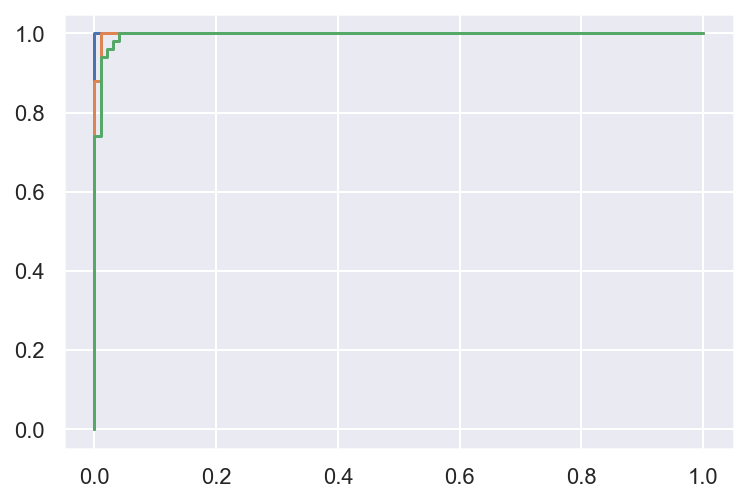

In [147]:
from sklearn.preprocessing import label_binarize

# answer
y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    # binary model
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

In [141]:
y1_vec = label_binarize(y1, [0, 1, 2])
model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, 1])
fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
print(model.predict_proba(X1))

[[1.00000000e+00 1.25181995e-24]
 [1.00000000e+00 1.94693278e-17]
 [1.00000000e+00 3.02553698e-20]
 [1.00000000e+00 1.86107755e-17]
 [1.00000000e+00 8.29537132e-26]
 [1.00000000e+00 1.64518684e-25]
 [1.00000000e+00 2.39102605e-20]
 [1.00000000e+00 2.86512726e-22]
 [1.00000000e+00 2.85795424e-15]
 [1.00000000e+00 8.68813022e-20]
 [1.00000000e+00 1.18003453e-27]
 [1.00000000e+00 3.90000843e-21]
 [1.00000000e+00 7.83351654e-19]
 [1.00000000e+00 1.19793998e-19]
 [1.00000000e+00 2.96367223e-36]
 [1.00000000e+00 4.40297000e-36]
 [1.00000000e+00 4.05216730e-29]
 [1.00000000e+00 5.13070310e-23]
 [1.00000000e+00 1.32188224e-26]
 [1.00000000e+00 1.87623182e-26]
 [1.00000000e+00 6.56757593e-22]
 [1.00000000e+00 1.70248924e-23]
 [1.00000000e+00 6.38979922e-28]
 [1.00000000e+00 9.77539683e-16]
 [1.00000000e+00 1.66329174e-19]
 [1.00000000e+00 1.96035966e-16]
 [1.00000000e+00 1.50482875e-18]
 [1.00000000e+00 3.63155884e-24]
 [1.00000000e+00 1.94034825e-23]
 [1.00000000e+00 2.50332551e-18]
 [1.000000

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [144]:
# 1 vs others
y1_vec[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [146]:
model.priors_

array([0.66666667, 0.33333333])

In [148]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X1, y1)
y1_pred = model.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [149]:
from sklearn.metrics import classification_report

print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


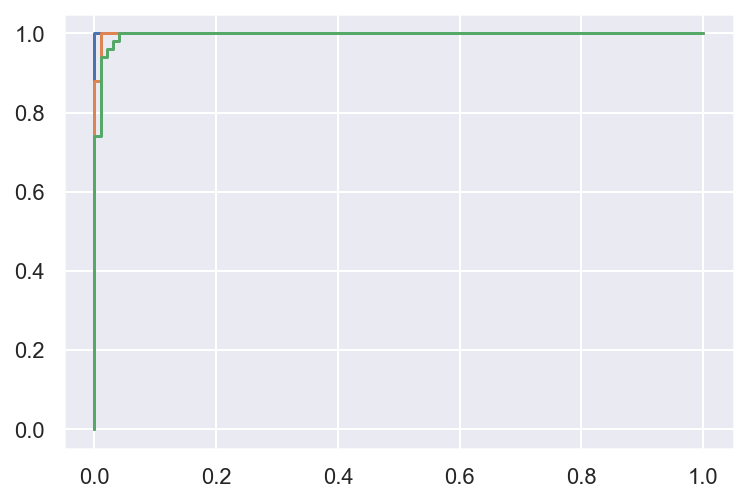

In [150]:
from sklearn.preprocessing import label_binarize

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

QDA를 하다 보면 문제가, 가능도 함수를 추정하려면, class마다 평균벡터와 공분산행렬을 추정해야 한다. <br>
feature가 1000개짜리면? 각 클래스마다 평균벡터($\mu$)는 1000개짜리 벡터, 공분산행렬은 100만개짜리 행렬. <br>
feature 10000개면? <br>

줄이려고 노력을 해봐야지. <br>


1. 데이터 분포 보면 대충 다들 동그랗게 모여있더라. 각 클래스마다 $\mu$와 sigma추정하지 말고, 어차피 완전히 정확할 필요 없잖아(위에서도 mu/sigma추정한거 보면 원래랑 조금씩 달라). 각 class마다 mu와 sigma가 똑같다고 가정하자. -> 이것을 가정한게 바로 아래 Linear Discriminative Analysis.  

### 선형판별분석법

모든 class에 대해 $\mu$와 sigma(공분산행렬) 같다고 가정한다.

선형판별분석법에서는 각 Y 클래스에 대한 독립변수 X의 조건부확률분포가 **공통된 공분산 행렬을 가지는** 다변수 정규분포(multivariate Gaussian normal distribution)이라고 가정한다. 즉

$$ \Sigma_k = \Sigma \;\;\; \text{ for all } k $$

이다.

이 때는 조건부확률분포를 다음과 같이 정리할 수 있다.

$$
\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}
$$

지수함수 취한다. 


$$
\begin{eqnarray}
p(x \mid y = k) 
&=& C'(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}
$$

이 식에서 $C'(x) = \exp C(x) $이다.

여기까지는 가능도 구한거고, 이제 조건부확률 구해야지. 

$$
\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C'(x)\exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{C'(x)\sum_l \exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{\sum_l P(y=l) \exp(w_l^Tx + w_{k0})} \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{P(x)} \\
\end{eqnarray}
$$

이 식에서 $P(x)$는 $y$ 클래스값에 영향을 받지 않는다.

따라서

$$
\log P(y=k \mid x) = \log P(y=k) + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C''_k
$$

모든 클래스 $k$에 대해 위와 같은 식이 성립하므로 클래스 $k_1$과 클래스 $k_2$의 경계선, 즉 두 클래스에 대한 확률값이 같아지는 $x$ 위치를 찾으면 다음과 같다.

$$  w_{k_1}^Tx + C''_{k_1} = w_{k_2}^Tx + C''_{k_2} $$

$$  (w_{k_1} - w_{k_2})^Tx + (C''_{k_1} - C''_{k_2}) = 0 $$

$$  w^Tx + C = 0 $$


즉, 판별함수가 x에 대한 선형방정식이 되고 ***경계선의 모양이 직선***이 된다.

Scikit-Learn은 선형판별분석법을 위한 `LinearDiscriminantAnalysis` 클래스를 제공한다. 

In [155]:
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", store_covariance=True).fit(X, y)

선형판별분석법에서는 기댓값 벡터만 클래스에 따라 달라지고 공분산 행렬은 공통으로 추정한다.

In [157]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [158]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

결과는 다음처럼 직선인 경계선을 가진다.

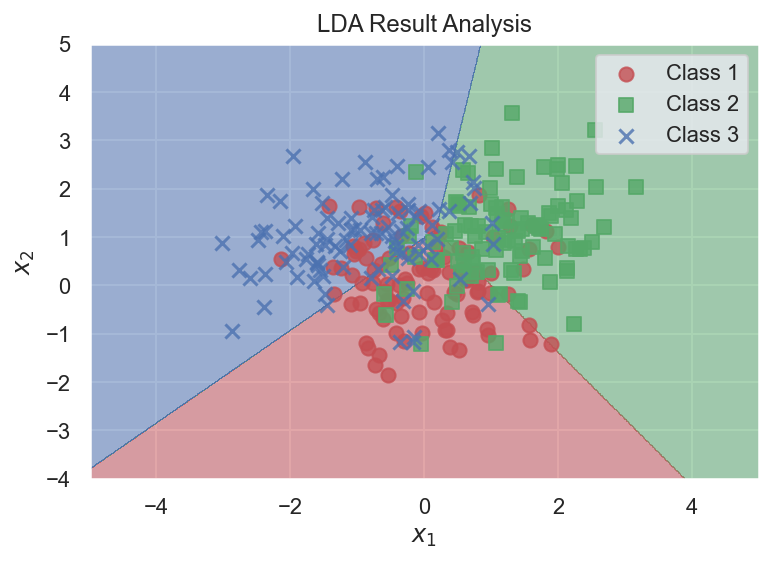

In [160]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="Class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="Class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="Class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA Result Analysis")
plt.show()

이론적으로 그랬던 것처럼, 직선으로 영역이 나오네. 

어쨋든 중요한것은, ***Covariance Matrix가 공통이라고 가정하면, QDA가 아니라 LDA이다.*** 라는 것만 알면 된다. 

#### 연습 문제 2

선형판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [161]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data
y2 = iris.target

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import confusion_matrix

confusion_matrix(y2, y2_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


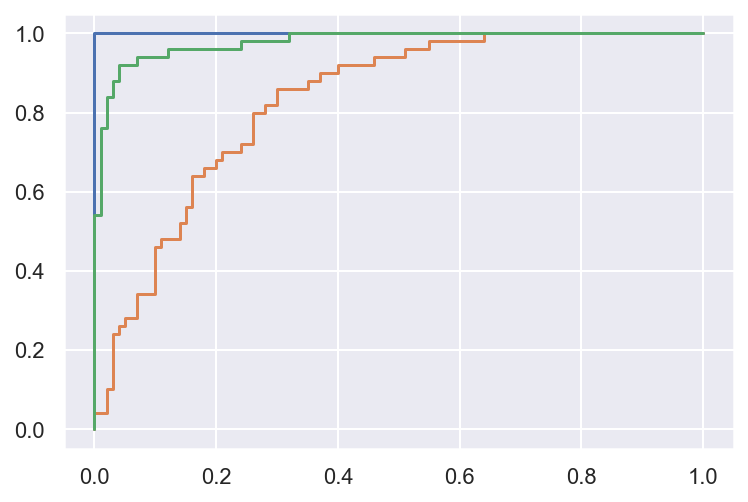

In [164]:
from sklearn.preprocessing import label_binarize

y2_vec = label_binarize(y2, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X2, y2_vec[:, i])
    fpr, tpr, thr = roc_curve(y2_vec[:, i], model.predict_proba(X2)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

## 7.2 나이브베이즈 분류모형

### 조건부독립

확률변수 A, B가 독립이면 A, B의 결합확률은 주변확률의 곱과 같다.

$$ P(A, B) = P(A)P(B) $$

조건부독립(conditional independence)은 일반적인 독립과 달리 조건이 되는 별개의 확률변수 C가 존재해야 한다.
조건이 되는 확률변수 C에 대한 A, B의 결합조건부확률이 C에 대한 A, B의 조건부확률의 곱과 같으면 A와 B가 C에 대해 조건부독립이라고 한다.

$$ P(A, B|C) = P(A|C) P(B|C) $$

기호로는 다음과 같이 표기한다.

$$ A \text{⫫} B \;\vert\; C $$

조건부독립과 비교하여 일반적인 독립은 무조건부독립이라고 한다. 무조건부독립은 다음과 같이 표기하도 한다.

$$ A \text{⫫} B \;\vert\; \emptyset $$

A, B가 C에 대해 조건부독립이면 다음도 만족한다.

$$ P(A|B,C) = P(A|C) $$

$$ P(B|A,C) = P(B|C) $$

주의할 점은 조건부독립과 무조건부독립은 관계가 없다는 점이다. 즉, 두 확률변수가 독립이라고 항상 조건부독립이 되는 것도 아니고 조건부독립이라고 꼭 독립이 되는 것도 아니다.

$$ P(A,B) = P(A)P(B) \;\; \bcancel{\implies} \;\; P(A,B|C) = P(A|C)P(B|C) $$

$$  P(A,B|C) = P(A|C)P(B|C) \;\; \bcancel{\implies} \;\; P(A,B) = P(A)P(B) $$

예를 들어 어떤 동물의 어미의 몸무게가 $x$kg일 때 새끼의 몸무게는 $x$를 기댓값으로 하고 5kg 표준편차를 가지는 정규분포라고 가정하자. 이 동물의 새끼 중 2마리의 몸무게를 각각 A, B라고 하고 어미의 몸무게를 C라고 한다. 시물레이션을 통해 어미 표본과 각각의 어미에 대해 2마리의 새끼 표본을 만들자.

In [ ]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

스캐터플롯을 보면 B와 C 자체는 상관관계가 있음을 알 수 있다. 하지만 어미의 몸무게가 고정되어 있으면 두 새끼의 몸무게는 서로 독립인 것을 볼 수 있다.

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

### 나이브 가정

독립변수 $x$가 $D$차원이라고 가정하자. 

$$ x = (x_1, \ldots, x_D) $$

가능도함수는 $x_1, \ldots, x_D$의 결합확률이 된다.

$$ P(x \mid y = k) = P(x_1, \ldots, x_D \mid y = k) $$ 

원리상으로는 $y=k$인 데이터만 모아서 이 가능도함수의 모양을 추정할 수 있다. 하지만 차원 $D$가 커지면 가능도함수의 추정이 현실적으로 어려워진다. 

따라서 나이즈베이즈 분류모형(Naive Bayes classification model)에서는 모든 차원의 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정을 사용한다. 이러한 가정을 나이브 가정(naive assumption)이라고 한다.



나이브 가정으로 사용하면 벡터 $x$의 결합확률분포함수는 개별 스칼라 원소 $x_d$의 확률분포함수의 곱이 된다.

$$
P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k)
$$

스칼라 원소 $x_d$의 확률분포함수는 결합확률분포함수보다 추정하기 훨씬 쉽다.

가능도함수를 추정한 후에는 베이즈정리를 사용하여 조건부확률을 계산할 수 있다.

$$
\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}
$$


### 정규분포 가능도 모형

$x$ 벡터의 원소가 모두 실수이고 클래스마다 특정한 값 주변에서 발생한다고 하면 가능도 분포로 정규분포를 사용한다.
각 독립변수 $x_d$마다, 그리고 클래스 $k$마다 정규 분포의 기댓값 $\mu_{d,k}$, 표준 편차 $\sigma_{d,k}^2$가 달라진다. QDA 모형과는 달리 모든 독립변수들이 서로 조건부독립이라고 가정한다.

$$ P(x_d \mid y = k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right) $$
  

### 베르누이분포 가능도 모형

베르누이분포 가능도 모형에서는 각각의 $x = (x_1,\ldots, x_D)$의 각 원소 $x_d$가 0 또는 1이라는 값만을 가질 수 있다. 즉 독립변수는 $D$개의 독립적인 베르누이 확률변수, 즉 동전으로 구성된 동전 세트로 표현할 수 있다. 이 동전들의 모수 $\mu_{d}$는 동전 $d$마다 다르다.

그런데 클래스 $y = k$ $(k=1,\ldots,K)$마다도 $x_d$가 1이 될 확률이 다르다. 즉, 동전의 모수 $\mu_{d,k}$는 동전 $d$마다 다르고 클래스 $k$마다도 다르다. 즉, 전체 $D \times K$의 동전이 존재하며 같은 클래스에 속하는 $D$개의 동전이 하나의 동전 세트를 구성하고 이러한 동전 세트가 $K$개 있다고 생각할 수 있다.

$$ P(x_d \mid y = k) = \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)} $$

$$ 
P(x_1, \ldots, x_D \mid y = k) 
= \prod_{d=1}^D \mu_{d,k}^{x_d} (1-\mu_{d,k})^{(1-x_d)}
$$

이러한 동전 세트마다 확률 특성이 다르므로 베르누이분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 동전 세트를 $N$번 던진 결과로부터 $1,\ldots,K$ 중 어느 동전 세트를 던졌는지를 찾아내는 모형이라고 할 수 있다.

### 다항분포 가능도 모형

다항분포 모형에서는 $x$ 벡터가 다항분포의 표본이라고 가정한다. 즉, $D$개의 면을 가지는 주사위를 $\sum_{d=1}^D x_d$번 던져서 나온 결과로 본다.
예를 들어 $x$가 다음과 같다면,

$$ x = (1, 4, 0, 5) $$

4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다.

각 클래스마다 주사위가 다르다고 가정하므로 $K$개의 클래스를 구분하는 문제에서는 $D$개의 면을 가진 주사위가  $K$개 있다고 본다. 

$$ 
P(x_1, \ldots, x_D \mid y = k) 
\;\; \propto \;\; \prod_{d=1}^D \mu_{d,k}^{x_{d,k}} 
$$

$$ \sum_{d=1}^{D} \mu_{d,k} = 1 $$

따라서 다항분포 가능도 모형을 기반으로 하는 나이브베이즈 모형은 주사위를 던진 결과로부터  $1,\ldots,K$ 중 어느 주사위를 던졌는지를 찾아내는 모형이라고 할 수 있다.

### 사이킷런에서 제공하는 나이브베이즈 모형

사이킷런의 naive_bayes 서브패키지에서는 다음과 같은 세가지 나이브베이즈 모형 클래스를 제공한다.

* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	정규분포 나이브베이즈
* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이분포 나이브베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항분포 나이브베이즈


이 클래스들은 다양한 속성값 및 메서드를 가진다. 우선 사전 확률과 관련된 속성은 다음과 같다.

* `classes_`

 * 종속변수 Y의 클래스(라벨)


* `class_count_`

 * 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수


* `class_prior_`

 * 종속변수 Y의 무조건부 확률분포 $ P(Y) $ (정규분포의 경우에만)
 

* `class_log_prior_`

 * 종속변수 Y의 무조건부 확률분포의 로그 $ \log P(Y) $ (베르누이분포나 다항분포의 경우에만)
 

### 정규분포 나이브베이즈 모형

가우시안 나이브베이즈 모형 `GaussianNB`은 가능도 추정과 관련하여 다음과 같은 속성을 가진다.

* `theta_`: 정규분포의 기댓값 $\mu$
* `sigma_`: 정규분포의 분산 $\sigma^2$

#### 예제

실수인 두 개의 독립변수 $x_1, x_2$와 두 종류의 클래스 $y=0,1$을 가지는 분류문제가 있다. 

두 독립변수의 분포는 정규분포이고 $y$의 클래스에 따라 다음처럼 모수가 달라진다.

$$ 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
$$
$$ 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
$$

데이터는 $y=0$인 데이터가 40개, $y=1$인 데이터가 60개 주어졌다. 이 데이터를 시각화하면 다음과 같다.

In [ ]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

이 데이터를 가우시안 나이브베이즈 모형으로 다음처럼 풀 수 있다.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률

$$ p(y=0), p(y=1) $$

의 값은 다음과 같다.

In [ ]:
model_norm.classes_

In [ ]:
model_norm.class_count_

In [ ]:
model_norm.class_prior_

각 클래스에 따라 $x$가 이루는 확률분포의 모수를 계산하면 다음과 같다. 나이브 가정에 따라 $x_1, x_2$는 독립이므로 상관관계를 구하지 않았다. 

In [ ]:
model_norm.theta_[0], model_norm.sigma_[0]

In [ ]:
model_norm.theta_[1], model_norm.sigma_[1]

이렇게 구한 데이터의 확률분포를 시각화하면 다음과 같다.

In [ ]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

이 모형을 사용하여 $x_{\text{new}} = (0, 0)$인 데이터의 $y$값을 예측하자. 각 클래스값이 나올 확률은 `predict_proba` 메서드로 구할 수 있다. 결과는 y=0일 확률이 0.48, y=1일 확률이 0.52이다.

In [ ]:
model_norm.predict_proba([x_new])

이 값이 나오게 된 중간 과정을 살펴보자. 우선 추정된 독립변수의 모수와 정규 분포의 확률 밀도 함수를 사용하여 가능도를 구할 수 있다.
나이브베이즈 가정에 따라 두 입력 변수의 곱을 결합 확률로 계산한다.

$$ p(x_1, x_2 | y) \propto p(x_1) p(x_2) $$

In [ ]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]
likelihood

여기에 사전 확률을 곱하면 사후 확률에 비례하는 값이 나온다.

$$ p(y|x_1, x_2) \propto p(x_1, x_2|y) p(y) $$

아직 정규화 상수 $p(x)$로 나누어주지 않았으므로 두 값의 합이 1이 아니다. 즉, 확률이라고 부를 수는 없다. 하지만 크기를 비교하면 y=0일 확률이 y=1일 확률보다 훨씬 크다는 것을 알 수 있다.

In [ ]:
posterior = likelihood * model_norm.class_prior_
posterior

이 값을 정규화하면 `predict_proba` 메서드로 구한 것과 같은 값이 나온다.

In [ ]:
posterior / posterior.sum()

#### 연습 문제 1

붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어보자.

(1) 각각의 종이 선택될 사전확률을 구하라.

(2) 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하라.

(3) 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라.

* 분류결과표
* 분류보고서

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target

from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB().fit(X1, y1)
model1.class_prior_

In [ ]:
model1.theta_

In [ ]:
model1.sigma_

In [ ]:
y1_pred = model1.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y1, y1_pred))

### 베르누이분포 나이브베이즈 모형

전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률변수로 모형화할 수 있다. 이렇게 독립변수가 0 또는 1의 값을 가지면 베르누이 나이브베이즈 모형을 사용한다. 

베르누이분포 나이브베이즈 모형 클래스 `BernoulliNB`는 가능도 추정과 관련하여 다음 속성을 가진다.

* `feature_count_`: 각 클래스 $k$에 대해 $d$번째 동전이 앞면이 나온 횟수 $N_{d,k}$
* `feature_log_prob_`: 베르누이분포 모수의 로그
 
$$ \log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$
 
여기에서 $N_k$은 클래스 $k$에 대해 동전을 던진 총 횟수이다. 
표본 데이터의 수가 적은 경우에는 모수에 대해 다음처럼 스무딩(smoothing)을 할 수도 있다.

### 스무딩

표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 다음과 값으로 변한다. 이를 라플라스 스무딩(Laplace smoothing) 또는 애드원(Add-One) 스무딩이라고 한다.

$$ \hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + 2 \alpha} $$ 

가중치 $\alpha$를 사용하여 스무딩의 정도를 조절할 수도 있다. 가중치 $\alpha$는 정수가 아니라도 괜찮다. 가중치가 1인 경우는 무정보 사전확률을 사용한 베이즈 모수추정의 결과와 같다.

In [ ]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

이 데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 예를 들어 첫번째 메일은 정상 메일이고 1번, 4번 키워드는 포함하지 않지만 2번, 3번 키워드를 포함한다고 볼 수 있다.

이 데이터를 베르누이 나이브베이즈 모형으로 예측해 보자.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률의 값은 다음과 같다.

In [ ]:
model_bern.classes_

In [ ]:
model_bern.class_count_

In [ ]:
np.exp(model_bern.class_log_prior_)

각 클래스 $k$ 별로, 그리고 각 독립변수 $d$ 별로, 각각 다른 베르누이 확률변수라고 가정하여 모두 8개의 베르누이 확률변수의 모수를 구하면 다음과 같다.

In [ ]:
fc = model_bern.feature_count_
fc

In [ ]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

그런데 이 값은 모형 내에서 구한 값과 다르다. 모형 내에서 스무딩(smoothing)이 이루어지기 때문이다. 스무딩은 동전의 각 면 즉, 0과 1이 나오는 가상의 데이터를 추가함으로서 추정한 모수의 값이 좀 더 0.5에 가까워지도록 하는 방법이다. 이 때 사용한 스무딩 가중치 값은 다음처럼 확인할 수 있다.

In [ ]:
model_bern.alpha

스무딩이 적용된 베르누이 모수값은 다음과 같다.

In [12]:
theta = np.exp(model_bern.feature_log_prob_)
theta

NameError: name 'model_bern' is not defined

이에 모형이 완성되었으니 테스트 데이터를 사용하여 예측을 해 본다. 예를 들어 1번, 2번 키워드를 포함한 메일이 정상 메일인지 스팸 메일인지 알아보자.

In [ ]:
x_new = np.array([0, 1, 1, 1])

In [ ]:
model_bern.predict_proba([x_new])

위 결과에서 정상 메일일 가능성이 약 3배임을 알 수 있다. 이 값은 다음처럼 구할 수도 있다.

In [ ]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

반대로 3번, 4번 키워드가 포함된 메일은 스팸일 가능성이 약 90%이다.

In [ ]:
x_new = np.array([0, 0, 1, 1])

In [ ]:
model_bern.predict_proba([x_new])

In [ ]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

#### 연습 문제 2

(1) MNIST 숫자 분류문제에서 `sklearn.preprocessing.Binarizer`로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다(다음 코드 참조)
```
from sklearn.datasets import load_digits
digits = load_digits()
X2 = digits.data
y2 = digits.target
from sklearn.preprocessing import Binarizer
X2 = Binarizer(7).fit_transform(X2)
```

이 이미지에 대해 베르누이 나이브베이즈 모형을 적용하자. 분류 결과를 분류보고서 형식으로 나타내라.

(2) `BernoulliNB` 클래스의 `binarize` 인수를 사용하여 같은 문제를 풀어본다.

(3) 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내라. 이 이미지는 무엇을 뜻하는가?


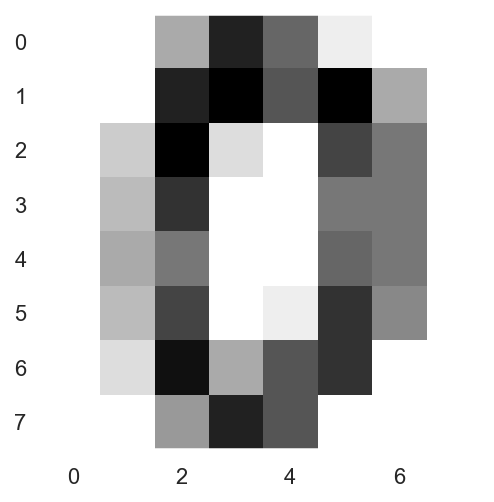

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target


plt.imshow(X2[0, :].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
from sklearn.preprocessing import Binarizer

X2 = Binarizer(7).fit_transform(X2)

plt.imshow(X2[0, :].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

In [ ]:
X2 = digits.data
y2 = digits.target

model = BernoulliNB(binarize=7).fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

In [ ]:
plt.imshow(np.exp(model.feature_log_prob_)[2].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

### 다항분포 나이브베이즈 모형

다항분포 나이브베이즈 모형 클래스 `MultinomialNB`는 가능도 추정과 관련하여 다음 속성을 가진다.

* `feature_count_`: 각 클래스 $k$에서 $d$번째 면이 나온 횟수 $N_{d,k}$
* `feature_log_prob_`: 다항분포의 모수의 로그
 
$$ \log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$
 
여기에서 $N_k$은 클래스 $k$에 대해 주사위를 던진 총 횟수를 뜻한다.

스무딩 공식은

$$ \hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + D \alpha} $$ 

이다.

이번에도 스팸 메일 필터링을 예로 들어보다. 다만 BOW 인코딩을 할 때, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용한다.

In [ ]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

사전 확률은 다음과 같이 구한다.

In [ ]:
model_mult.classes_

In [ ]:
model_mult.class_count_

In [ ]:
np.exp(model_mult.class_log_prior_)

다음으로 각 클래스에 대한 가능도 확률분포를 구한다. 다항분포 모형을 사용하므로 각 클래스틑 4개의 면을 가진 주사위로 생각할 수 있다. 그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 우선 각 클래스 별로 각각의 면이 나온 횟수는 다음과 같다. 

In [ ]:
fc = model_mult.feature_count_
fc

이 데이터에서 클래스 Y=0인 주사위를 던진 횟수는 첫번째 행의 값의 합인 40이므로 클래스 Y=0인 주사위를 던져 1이라는 면이 나올 확률은 다음처럼 계산할 수 있다.

$$ \mu_{1,Y=0} = \dfrac{12}{40} = 0.3 $$

In [ ]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

실제로는 극단적인 추정을 피하기 위해 이 값을 가중치 1인 스무딩을 한 추정값을 사용한다.

In [ ]:
model_mult.alpha

In [ ]:
(fc + model_mult.alpha) / \
    (np.repeat(fc.sum(axis=1)[:, np.newaxis],
               4, axis=1) + model_mult.alpha * X.shape[1])

이렇게 구한 모수 추정치는 다음과 같다.

In [ ]:
theta = np.exp(model_mult.feature_log_prob_)
theta

이제 이 값을 사용하여 예측을 해 보자. 만약 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음처럼 확률을 구할 수 있다. 구해진 확률로부터 이 메일이 스팸임을 알 수 있다. 

In [ ]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

다항분포의 확률질량함수을 사용하면 다음처럼 직접 확률을 구할 수도 있다.

In [ ]:
p = (theta ** x_new).prod(axis=1)*np.exp(model_bern.class_log_prior_)
p / p.sum()

#### 연습 문제 3

MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

#### 연습 문제 4

텍스트 분석에서 TF-IDF 인코딩을 하면 단어의 빈도수가 정수가 아닌 실수값이 된다. 이런 경우에도  다항분포 모형을 적용할 수 있는가?


In [ ]:
X4 = np.array([
    [3.1, 4.0, 1.0, 2.0],
    [3.0, 5.0, 1.0, 1.0],
    [3.0, 3.5, 0.0, 4.0],
    [3.0, 4.0, 1.0, 2.8],
    [1.0, 2.1, 1.0, 4.0],
    [0.0, 0.0, 5.0, 3.0],
    [1.0, 2.0, 4.0, 1.0],
    [1.0, 1.0, 4.1, 2.0],
    [0.0, 1.0, 2.0, 5.0],
    [2.9, 1.0, 2.0, 3.0]])
y4 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn.naive_bayes import MultinomialNB

model_mult4 = MultinomialNB().fit(X4, y4)
y4_pred = model_mult4.predict(X4)

from sklearn.metrics import classification_report

print(classification_report(y4, y4_pred))

### 뉴스그룹 분류

다음은 뉴스그룹 데이터에 대해 나이브베이즈 분류모형을 적용한 결과이다. 

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('model', MultinomialNB()),
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english",
                             token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB()),
])

In [ ]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i + 1, np.mean(scores)))

#### 연습 문제 5

(1) 만약 독립변수로 실수 변수, 0 또는 1 값을 가지는 변수, 자연수 값을 가지는 변수가 섞여있다면 사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀 수 있는가?

(2) 사이킷런에서 제공하는 분류문제 예제 중 숲의 수종을 예측하는 covtype 분류문제는 연속확률분포 특징과 베르누이확률분포 특징이 섞여있다. 이 문제를 사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀어라.

In [ ]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
X = covtype.data
y = covtype.target
X1 = X[:, :10]
X2 = X[:, 10:]
X1[0], X2[0]

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

likeli1 = prob1 / model1.class_prior_
likeli2 = prob2 / model1.class_prior_
prob = likeli1 * likeli2 * model1.class_prior_
y_pred = np.argmax(prob, axis=1) + 1

In [ ]:
confusion_matrix(y, y_pred)

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
model = BernoulliNB().fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

# 감성 분석

앞에서 공부한 나이브 베이즈 분류 모형을 이용하여 문서에 대한 감성 분석(sentiment analysis)를 해보자. 감성 분석이란 문서에 대해 좋다(positive) 혹은 나쁘다(negative)는 평가를 내리는 것을 말한다.

샘플 데이터로는 github에 올려져 있는 네이버 영화 감상평에 대한 감성 분석 예제를 이용한다.

* https://github.com/e9t/nsmc

## 데이터 전처리

우선 데이터를 다운로드 받아서 읽어보자.

In [15]:
%%time
!rm -f ratings_train.txt ratings_test.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

--2021-08-30 14:48:53--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  15.8MB/s    in 0.9s    

2021-08-30 14:48:56 (15.8 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2021-08-30 14:48:57--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [text/plain]
Savin

여기에서는 유니코드로 인코딩하며 읽기 위해 codecs 패키지를 사용한다. 읽어들인 결과는 유니코드 문자열이 된다.

In [ ]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

이 데이터는 번호, 내용, 평점으로 이루져 있으므로 내용을 X, 평점을 y로 저장한다.

In [16]:
from pprint import pprint
pprint(data[0])

NameError: name 'data' is not defined

In [ ]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

이제 이 데이터를 다항 나이브 베이즈 모형으로 학습시킨다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB()),
])

In [ ]:
%%time
model1.fit(X, y)

모형의 성능을 보기 위해 테스트 데이터도 읽어들인다.

In [ ]:
import codecs
with codecs.open("ratings_test.txt", encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]   # header 제외

In [ ]:
X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

print(classification_report(y_test, model1.predict(X_test)))

이 결과를 Tfidf 방법을 사용했을 때와 비교해 보자.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('mb', MultinomialNB()),
])

In [ ]:
%%time
model2.fit(X, y)

In [ ]:
print(classification_report(y_test, model2.predict(X_test)))

이번에는 형태소 분석기를 사용한 결과와 비교한다.

In [ ]:
from konlpy.tag import Okt
pos_tagger = Okt()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [ ]:
model3 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize_pos)),
    ('mb', MultinomialNB()),
])

In [ ]:
%%time
model3.fit(X, y)

In [ ]:
print(classification_report(y_test, model3.predict(X_test)))

(1,2)-gram 을 사용하면 성능이 더 개선되는 것을 볼 수 있다.

In [ ]:
model4 = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1, 2))),
    ('mb', MultinomialNB()),
])

In [ ]:
%%time
model4.fit(X, y)

In [ ]:
print(classification_report(y_test, model4.predict(X_test)))